# Вариант 1

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# task 1
from scipy.stats import shapiro, kstest
# task 2, 3
from scipy.stats import ttest_ind, mannwhitneyu

alpha = 0.05

# Задание 1

Посмотрим, как распределились баллы за тест по математике

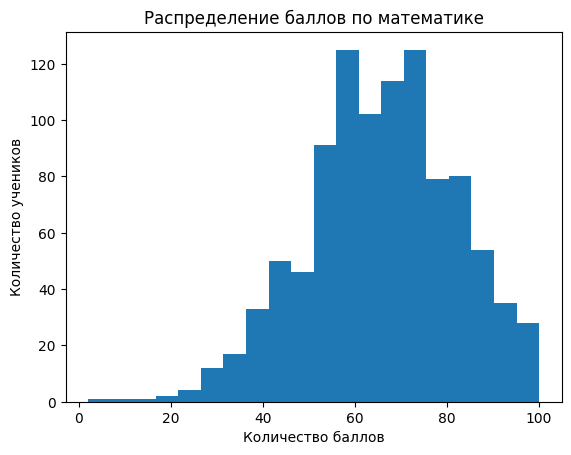

In [8]:
data = pd.read_csv("exams_dataset.csv")
plt.hist(data["math score"], bins=20)
plt.ylabel("Количество учеников")
plt.xlabel("Количество баллов")
plt.title("Распределение баллов по математике")
plt.show()

Формально наша задача звучит следующи образом:
# $H_0$: Результаты по математике имеют нормальное распределение
# $H_1$: Результаты по математике нельзя приблизить нормальным распределением

для решения задачи воспользуемся Критерием Шапиро-Уилка и Критерием Колмогорова-Смирнова

In [9]:
math_data = data["math score"]


print("По критерию Шапиро-Уилка:")

sw_test = shapiro(math_data)
if sw_test.pvalue > alpha:
    print("Принимам нулевую гипотезу")
else:
    print("Не принимаем нулевую гипотезу")

print("\nПо критерию Колмогорова-Смирнова:")

ks_test = kstest(math_data, "norm")

prefix = "Используя стандартные мат ожидание и диперсию в качестве параметров нормального распределения: "
if ks_test.pvalue > alpha:
    postfix = "Принимам нулевую гипотезу"
else:
    postfix = "Принимаем альтернативную гипотезу"
print(prefix + postfix)


ks_test = kstest(math_data, "norm", args=(np.mean(math_data), np.std(math_data)))

prefix = "Используя высчитанные мат ожидание и дисперсию в качестве параметров нормального распределения: "
if ks_test.pvalue > alpha:
    postfix = "Принимам нулевую гипотезу"
else:
    postfix = "Принимаем альтернативную гипотезу"
print(prefix + postfix)

По критерию Шапиро-Уилка:
Не принимаем нулевую гипотезу
ShapiroResult(statistic=0.9937615394592285, pvalue=0.0003466971102170646)

По критерию Колмогорова-Смирнова:
KstestResult(statistic=0.999, pvalue=0.0, statistic_location=11, statistic_sign=-1)
Используя стандартные мат ожидание и диперсию в качестве параметров нормального распределения: Принимаем альтернативную гипотезу
KstestResult(statistic=0.02630185637845328, pvalue=0.48534977439991145, statistic_location=71, statistic_sign=-1)
Используя высчитанные мат ожидание и дисперсию в качестве параметров нормального распределения: Принимам нулевую гипотезу


  Если запустить код, можно заметить, что результаты тестов различились. Критерий Шапиро-Уилка и Критерий Колмогорова-Смирнова без параметра $args$ показали, что оценки нельзя апроксимировать нормальным распределеним, а Критерий Колмогорова-Смирнова с указанным параметром $args$ показал обратный результат.

  Объяснить это можно тем, что первые два теста в качестве распределения используют $N(0, 1)$, которые не позволяют нам приблизить результаты распределений

In [10]:
print(f"Выборочное среднее: {np.mean(data['math score'])}")
print(f"Выборочная дисперсия: {np.std(data['math score'])}")

Выборочное среднее: 65.802
Выборочная дисперсия: 16.272455131294723


# Задание 2
Поставим условие нашей задачи более формально
# $H_0$: Результаты по чтению и письменной принципиально не отличаются
# $H_1$: Результаты по чтению и письменной части отличаются

Для решения задачи воспользуемся t-Критерием Стьюдента и U-критерием Манна-Уитни

In [13]:
reading_data = data["reading score"]
writing_data = data["writing score"]


print("По t-критерию Стьюдента: ")

t_test = ttest_ind(reading_data, writing_data)

if t_test.pvalue > alpha:
    print("Принимаем нулевую гипотезу")
else:
    print("Принимаем альтернативную гипотезу")


print("\nПо U-критерию Манна-Уитни")

u_test = mannwhitneyu(reading_data, writing_data)

if u_test.pvalue > alpha:
    print("Принимаем нулевую гипотезу")
else:
    print("Принимаем альтернативную гипотезу")

print(f"\n{t_test}\n{u_test}")

По t-критерию Стьюдента: 
Принимаем нулевую гипотезу

По U-критерию Манна-Уитни
Принимаем нулевую гипотезу

Ttest_indResult(statistic=1.5383891898620217, pvalue=0.12411182707182183)
MannwhitneyuResult(statistic=518147.5, pvalue=0.1598487858131621)


Тест сошлись в результате и, судя по ним, между результатами тестов по чтению и письму нет принципиальной разницы

# Задание 3
Поставим условие нашей задачи более формально
# $H_0$: Люди, посещавшие курсы, сдали экзамены лучше
# $H_1$: Посещение курсов не повлияло на результаты экзамена

Для решения задачи также воспользуемся t-Критерием Стьюдента и U-критерием Манна-Уитни

In [12]:
cols = ["math score", "reading score", "writing score"]
courses_grades = data[data["test preparation course"] == "completed"][cols].sum(axis=1)
self_grades = data[data["test preparation course"] == "none"][cols].sum(axis=1)


print("По t-критерию Стьюдента: ")

t_test = ttest_ind(courses_grades, self_grades)

if t_test.pvalue > alpha:
    print("Принимаем нулевую гипотезу")
else:
    print("Принимаем альтернативную гипотезу")


print("\nПо U-критерию Манна-Уитни")

u_test = mannwhitneyu(courses_grades, self_grades)

if u_test.pvalue > alpha:
    print("Принимаем нулевую гипотезу")
else:
    print("Принимаем альтернативную гипотезу")



По t-критерию Стьюдента: 
Принимаем альтернативную гипотезу

По U-критерию Манна-Уитни
Принимаем альтернативную гипотезу


Тесты опять таки сошлись в результате, и, судя по их итогам, посещение дополнительных курсов не помогло сдать экзамены